<a href="https://colab.research.google.com/github/Yavar-Azar/Courses/blob/main/QE/ColabQE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum ESPRESSO (QE) in Google Colab

## Installation Steps

- Install Conda in Colab
- Use Conda to install Quantum ESPRESSO
- Install ASE (Atomic Simulation Environment)

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

# install quantum espresso from conda
!conda install conda-forge::qe
!pip install ase

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda-forge::qe


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    elpa-2021.11.002           |mpi_openmpi_ha0c50f8_1         3.4 MB  conda-forge

Create a new directory, navigate into it, and download the example file.

In [ ]:
import os
os.chdir('/content')

In [ ]:
! pwd

/content


In [ ]:
import os
! mkdir Example_1
os.chdir('Example_1')
! wget https://github.com/Yavar-Azar/Courses/raw/refs/heads/main/QE/Colab/inputs.zip


--2024-10-12 13:44:43--  https://github.com/Yavar-Azar/Courses/raw/refs/heads/main/QE/Colab/inputs.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Yavar-Azar/Courses/refs/heads/main/QE/Colab/inputs.zip [following]
--2024-10-12 13:44:44--  https://raw.githubusercontent.com/Yavar-Azar/Courses/refs/heads/main/QE/Colab/inputs.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 957945 (935K) [application/zip]
Saving to: ‘inputs.zip’

inputs.zip          100%[===================>] 935.49K  4.55MB/s    in 0.2s    

2024-10-12 13:44:45 (4.55 MB/s) - ‘inputs.zip’ saved [957945/957945]



In [ ]:
! unzip inputs.zip


Archive:  inputs.zip
  inflating: As.pbe-n-rrkjus_psl.1.0.0.UPF  
  inflating: GaAs.cif                
  inflating: Ga.pbe-dnl-rrkjus_psl.1.0.0.UPF  


In [ ]:
! ls

As.pbe-n-rrkjus_psl.1.0.0.UPF  GaAs.cif  Ga.pbe-dnl-rrkjus_psl.1.0.0.UPF  inputs.zip


In [36]:
from ase.io import read, write
from ase.calculators.espresso import Espresso, EspressoProfile

struct = read('GaAs.cif')

pseudo_dict = {
    "As": "As.pbe-n-rrkjus_psl.1.0.0.UPF",
    "Ga": "Ga.pbe-dnl-rrkjus_psl.1.0.0.UPF",
}

profile = EspressoProfile(
    command='/usr/local/bin/pw.x', pseudo_dir='./'
)

input_data={
        "pseudo_dir": "./",
        'control': {
            'calculation': 'scf',
            'verbosity': 'high',
            'pseudo_dir': "./",
            'restart_mode': 'from_scratch',
            'tstress': True
        },
        'ecutrho': 240,
        'ecutwfc': 30,
        'diagonalization': 'david',
        'occupations': 'smearing',
        'smearing': 'mp',
        'mixing_mode': 'plain',
        'mixing_beta': 0.7,
        'degauss': 0.001,
        'nspin': 1
    }

calc = Espresso(profile=profile,
    pseudopotentials=pseudo_dict,
    kpts=(4, 4, 4),input_data=input_data)

In [37]:
struct.calc = calc

In [38]:
struct.get_potential_energy()

-10420.763568344255

In [ ]:
fermi_level = calc.get_fermi_level()

In [27]:
# Get the lattice and band path
lattice = struct.get_cell()
bandpath = lattice.bandpath(npoints=60)
input_data['control'].update({'calculation':'bands','restart_mode':'restart','verbosity':'high'})
# Set up the calculator for band structure calculation

In [28]:
struct.calc = Espresso(profile=profile,
    pseudopotentials=pseudo_dict, kpts={'path': bandpath.kpts},
    input_data=input_data)


In [29]:
struct.calc.calculate(struct, [], [])

KeyboardInterrupt: 

In [ ]:
from ase.spectrum.band_structure import BandStructure, get_band_structure
bands = get_band_structure(struct, reference=fermi_level)

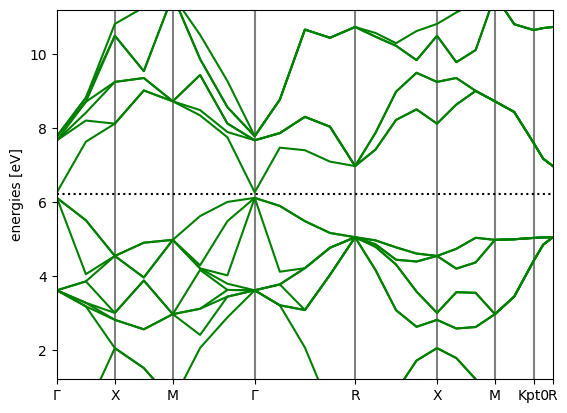

<Axes: ylabel='energies [eV]'>

In [ ]:
bands.plot(show=True, emin=fermi_level - 5, emax=fermi_level + 5.0)